<a href="https://colab.research.google.com/github/Rajashekarkaredla/Data-Analytics/blob/main/E_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
ec_df=pd.read_csv('E-com.csv')
ec_df

Saving E-com.csv to E-com.csv


,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No
...,...,...,...,...,...,...,...,...,...,...,...
99995,ORD099996,CUST5324,JioMart,49:29.5,24,Dairy,289,Packaging could be better.,3,No,No
99996,ORD099997,CUST1677,JioMart,18:29.5,19,Snacks,322,Good quality products.,4,No,No
99997,ORD099998,CUST8198,JioMart,27:29.5,41,Dairy,135,"Fast delivery, great service!",5,Yes,No
99998,ORD099999,CUST9975,JioMart,14:29.5,31,Grocery,973,Quick and reliable!,5,No,No


In [ ]:
#checking for null values
ec_df.isnull().sum()
#check for duplicates
#ec_df[ec_df.duplicated()]

,0
Order ID,0
Customer ID,0
Platform,0
Order Date & Time,0
Delivery Time (Minutes),0
Product Category,0
Order Value (INR),0
Customer Feedback,0
Service Rating,0
Delivery Delay,0


In [ ]:
#checking fo any duplicate order id
ec_df['Order ID'].duplicated().sum()

np.int64(0)

In [ ]:
#Number of unique customers
ec_df['Order ID'].nunique()

100000

In [ ]:
#Number of unique customers
ec_df['Customer ID'].nunique()

9000

In [ ]:
#Average orders per customer
round(ec_df['Order ID'].count()/(ec_df['Customer ID'].nunique()),0)

np.float64(11.0)

In [ ]:
#orders of each customer
ec_df['Customer ID'].value_counts()

,Order ID
Customer ID,
CUST1000,10
CUST1001,17
CUST1002,12
CUST1003,7
CUST1004,11
...,...
CUST9995,9
CUST9996,11
CUST9997,7


In [ ]:
#Platform-wise percentage of order count
(ec_df['Platform'].value_counts()/len(ec_df)*100).reset_index()

,Platform,count
0,Swiggy Instamart,33.449
1,Blinkit,33.424
2,JioMart,33.127


In [ ]:
#Platform-wise of order count
ec_df['Platform'].value_counts()

,count
Platform,
Swiggy Instamart,33449
Blinkit,33424
JioMart,33127


In [ ]:
#top platform used
ec_df['Platform'].value_counts().idxmax()

'Swiggy Instamart'

In [ ]:
import pandas as pd

def convert_to_datetime(time_str):
    try:
        # Attempt to split with 2 colons (HH:MM:SS)
        hours, minutes, seconds = map(float, time_str.split(":"))
        return pd.Timedelta(hours=hours, minutes=minutes, seconds=seconds)
    except ValueError:
        try:
            # If that fails, try splitting with 1 colon (HH:MM)
            hours, minutes = map(float, time_str.split(":"))
            return pd.Timedelta(hours=hours, minutes=minutes)
        except ValueError:
            # If both fail, handle the error (e.g., return NaT or print a message)

            return pd.NaT  # Return Not a Time

ec_df["timedelta"] = ec_df["Order Date & Time"].apply(convert_to_datetime)
base_date = pd.Timestamp("2025-04-17")
ec_df["date_time"] = base_date + ec_df["timedelta"]
ec_df["date_time"]

,date_time
0,2025-04-17 19:29:30
1,2025-04-19 06:29:30
2,2025-04-17 21:29:30
3,2025-04-17 19:29:30
4,2025-04-19 01:29:30
...,...
99995,2025-04-19 01:29:30
99996,2025-04-17 18:29:30
99997,2025-04-18 03:29:30
99998,2025-04-17 14:29:30


In [ ]:
#extracting hours column
ec_df['order_hour']=ec_df['date_time'].dt.hour
ec_df['order_hour']

,order_hour
0,19
1,6
2,21
3,19
4,1
...,...
99995,1
99996,18
99997,3
99998,14


In [ ]:
#changing 0hr to 24
ec_df.loc[ec_df['order_hour'] == 0, 'order_hour'] = 24
ec_df['order_hour']

,order_hour
0,19
1,6
2,21
3,19
4,1
...,...
99995,1
99996,18
99997,3
99998,14


In [ ]:
#finding peek order hour
ec_df['order_hour'].value_counts().dxmax#sort_values(ascending=False).reset_index().head(1)

NameError: name 'ec_df' is not defined

In [ ]:
#average delivary time
ec_df['Delivery Time (Minutes)'].mean()

np.float64(29.53614)

In [ ]:
#product category take maximum time to delivary
ec_df.sort_values(by='Delivery Time (Minutes)',ascending=False)[['Delivery Time (Minutes)','Product Category']].head(1)

,Delivery Time (Minutes),Product Category
47735,76,Fruits & Vegetables


In [ ]:
#product category take minimum time to delivary
ec_df.sort_values(by='Delivery Time (Minutes)',ascending=True)[['Delivery Time (Minutes)','Product Category']].head(1)

,Delivery Time (Minutes),Product Category
8037,5,Snacks


In [ ]:
#platform with total order values
ec_df.groupby('Platform')['Order Value (INR)'].sum().reset_index()

,Platform,Order Value (INR)
0,Blinkit,19705084
1,JioMart,19562372
2,Swiggy Instamart,19831984


In [ ]:
#average order values
ec_df['Order Value (INR)'].mean()

np.float64(590.9944)

In [ ]:
#high value orders(greater than 1000 INR)
ec_df[ec_df['Order Value (INR)']>1000][['Platform','Product Category']]

,Platform,Product Category
5,Blinkit,Personal Care
6,JioMart,Personal Care
9,JioMart,Grocery
11,JioMart,Grocery
24,Blinkit,Grocery
...,...,...
99938,Swiggy Instamart,Personal Care
99943,Blinkit,Grocery
99961,JioMart,Grocery
99964,JioMart,Grocery


In [ ]:
#products that ordered
ec_df['Product Category'].value_counts().sort_values(ascending=False).reset_index()

,Product Category,count
0,Dairy,16857
1,Grocery,16737
2,Snacks,16705
3,Fruits & Vegetables,16632
4,Beverages,16536
5,Personal Care,16533


In [ ]:
#total values of products
ec_df.groupby('Product Category')['Order Value (INR)'].sum().sort_values(ascending=False).reset_index()

,Product Category,Order Value (INR)
0,Personal Care,17395601
1,Grocery,14194055
2,Beverages,9086669
3,Dairy,7610522
4,Fruits & Vegetables,6246517
5,Snacks,4566076


In [ ]:
#highest order value
ec_df.sort_values(by='Order Value (INR)',ascending=False)[['Order Value (INR)','Customer ID','Product Category','Platform']].head(1)

,Order Value (INR),Customer ID,Product Category,Platform
98210,2000,CUST5408,Personal Care,JioMart


In [ ]:
#lowest order value
ec_df.sort_values(by='Order Value (INR)',ascending=True)[['Order Value (INR)','Customer ID','Product Category','Platform']].head(1)

,Order Value (INR),Customer ID,Product Category,Platform
72635,50,CUST3476,Snacks,Swiggy Instamart


In [ ]:
#approx number of good feedbacks
ec_df['Customer Feedback'].str.contains("good|excellent|fast|great|Quick|satisfied|Easy|loved", case=False, na=False).value_counts().reset_index()


,Customer Feedback,count
0,False,53523
1,True,46477


In [ ]:
(ec_df['Customer Feedback'].str.contains("good|excellent|fast|great|Quick|satisfied|Easy|loved", case=False, na=False).value_counts()/len(ec_df)*100).reset_index()


,Customer Feedback,count
0,False,53.523
1,True,46.477


In [ ]:
#best orders
ec_df[(ec_df['Service Rating']==5) & (ec_df['Order Value (INR)']<100) & (ec_df['Delivery Time (Minutes)']<6)]

,Order ID,Customer ID,Platform,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested,date_time,order_hour
4171,ORD004172,CUST8583,Blinkit,5,Snacks,71,Quick and reliable!,5,No,No,2025-04-19 02:29:30,2
8281,ORD008282,CUST3102,Blinkit,5,Fruits & Vegetables,65,Very satisfied with the service.,5,No,No,2025-04-18 14:29:30,14
17976,ORD017977,CUST2296,JioMart,5,Snacks,53,Very satisfied with the service.,5,No,No,2025-04-17 17:29:30,17
20396,ORD020397,CUST1129,JioMart,5,Snacks,99,Excellent experience!,5,No,No,2025-04-18 06:29:30,6
31676,ORD031677,CUST9012,JioMart,5,Fruits & Vegetables,75,Excellent experience!,5,No,No,2025-04-18 18:29:30,18
50054,ORD050055,CUST3891,JioMart,5,Snacks,71,Excellent experience!,5,No,No,2025-04-17 06:29:30,6
56402,ORD056403,CUST4090,Swiggy Instamart,5,Snacks,65,Very satisfied with the service.,5,No,No,2025-04-19 07:29:30,7
68564,ORD068565,CUST1712,Swiggy Instamart,5,Fruits & Vegetables,96,"Fast delivery, great service!",5,No,No,2025-04-18 17:29:30,17
94624,ORD094625,CUST5047,Swiggy Instamart,5,Fruits & Vegetables,91,Quick and reliable!,5,No,No,2025-04-19 10:29:30,10


In [ ]:
#best products
ec_df[(ec_df['Service Rating']==5) & (ec_df['Order Value (INR)']<100) & (ec_df['Delivery Time (Minutes)']<6)]['Product Category'].unique()

array(['Snacks', 'Fruits & Vegetables'], dtype=object)

In [ ]:
#total Refund Requested
ec_df['Refund Requested'].value_counts().reset_index()

,Refund Requested,count
0,No,54181
1,Yes,45819


In [ ]:
#total percentage of Refund Requests
(ec_df['Refund Requested'].value_counts()/len(ec_df)*100).reset_index()

,Refund Requested,count
0,No,54.181
1,Yes,45.819


In [ ]:
ec_df[ec_df['Delivery Delay']=='Yes']['Refund Requested'].value_counts().reset_index()

,Refund Requested,count
0,No,7374
1,Yes,6298


In [ ]:
ec_df[ec_df['Service Rating']<2]['Refund Requested'].value_counts().reset_index()

,Refund Requested,count
0,Yes,15267


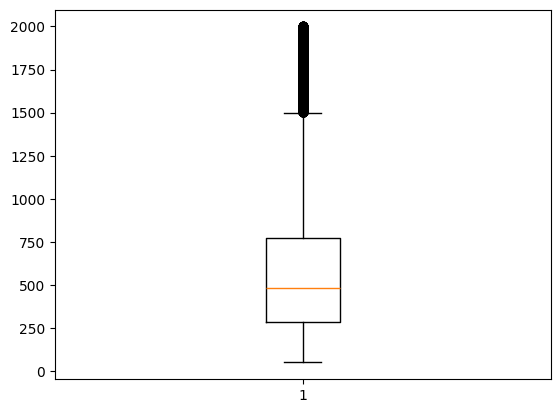

In [ ]:
#verification
import matplotlib.pyplot as plt
plt.boxplot(ec_df['Order Value (INR)'])
plt.show()


In [ ]:
#correlation
corr=ec_df[['Delivery Time (Minutes)','order_hour','Service Rating','Order Value (INR)']].corr()


,Delivery Time (Minutes),order_hour,Service Rating,Order Value (INR)
Delivery Time (Minutes),1.000000,-0.001215,0.000136,0.007225
order_hour,-0.001215,1.000000,-0.001455,-0.001690
Service Rating,0.000136,-0.001455,1.000000,-0.002689
Order Value (INR),0.007225,-0.001690,-0.002689,1.000000


In [ ]:
import seaborn as sns
sns.heatmap(ec_df[['Delivery Time (Minutes)','order_hour','Service Rating','Order Value (INR)']],annot=True,cmap='coolwarm')

KeyError: "['order_hour'] not in index"

In [ ]:
ec_df.columns

Index(['Order ID', 'Customer ID', 'Platform', 'Delivery Time (Minutes)',
       'Product Category', 'Order Value (INR)', 'Customer Feedback',
       'Service Rating', 'Delivery Delay', 'Refund Requested', 'date_time',
       'order_hour'],
      dtype='object')

<Axes: xlabel='Platform', ylabel='count'>

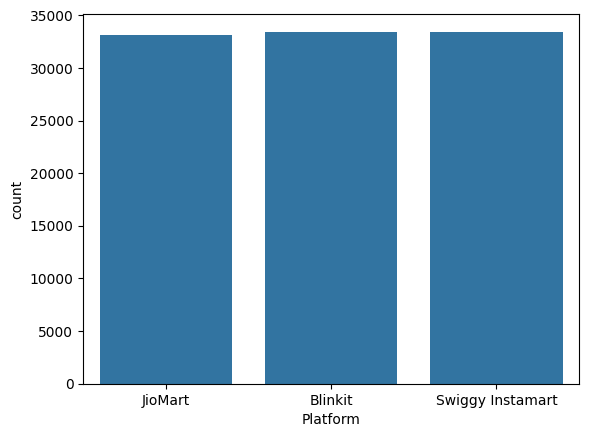

In [ ]:

import plotly.express as ex
sns.countplot(data=ec_df,x='Platform')


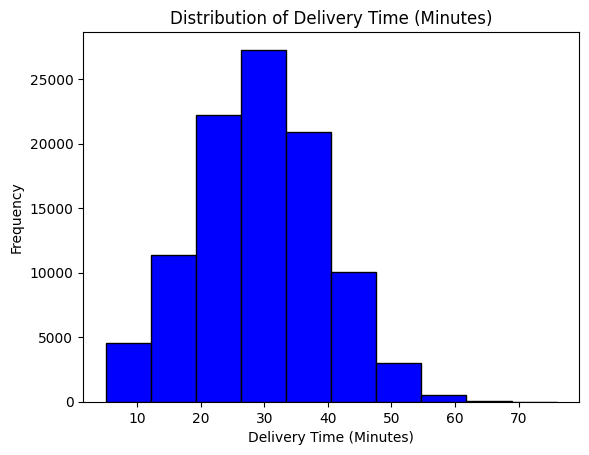

In [ ]:
plt.hist(ec_df['Delivery Time (Minutes)'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Frequency')
plt.show()


<Axes: xlabel='Delivery Time (Minutes)', ylabel='Product Category'>

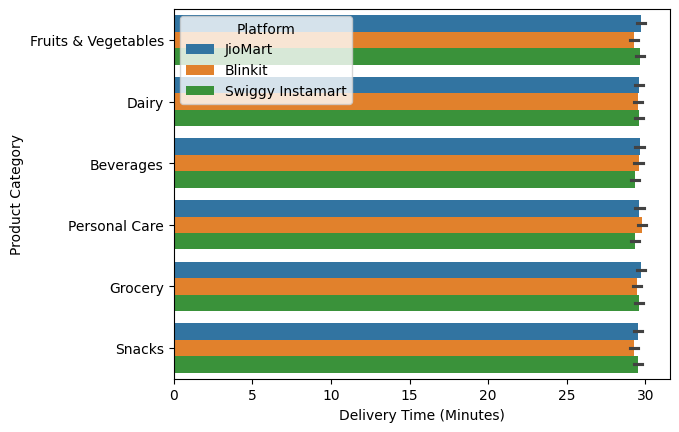

In [ ]:
sns.barplot(data=ec_df,x='Delivery Time (Minutes)',y='Product Category',hue='Platform')

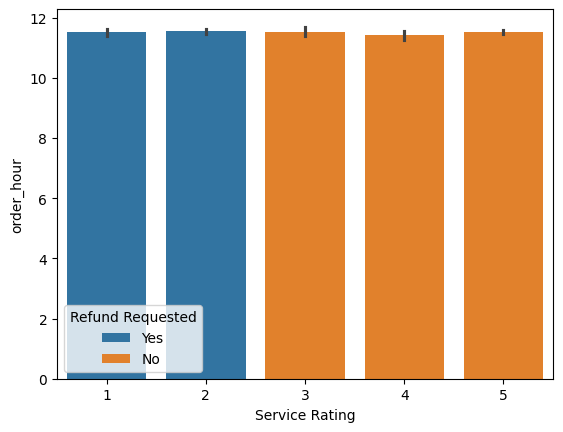

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(data=ec_df,x='Service Rating',y='order_hour',hue='Refund Requested')
plt.show()

In [ ]:
ex.scatter_3d(data_frame=ec_df,x='Order Value (INR)',y='Delivery Time (Minutes)',z='Platform',color='Refund Requested',size='Delivery Time (Minutes)')

In [ ]:
ec_df.columns

Index(['Order ID', 'Customer ID', 'Platform', 'Delivery Time (Minutes)',
       'Product Category', 'Order Value (INR)', 'Customer Feedback',
       'Service Rating', 'Delivery Delay', 'Refund Requested', 'date_time',
       'order_hour'],
      dtype='object')

In [ ]:
# Save the DataFrame to a CSV file
ec_df.to_csv('modified_dataset.csv', index=False)
# Download the file to your local machine
from google.colab import files
files.download('modified_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>